In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame({
    'beta': np.random.beta(5,1,1000)*60,
    'exponential': np.random.exponential(10,1000),
    'normal_p': np.random.normal(10,2,1000),
    'normal_l': np.random.normal(10,10,1000),
})



In [3]:
first_half = np.random.normal(20,3,500)
second_half = np.random.normal(-20,3,500)
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,58.698292,4.693170,10.472648,10.715980,16.359778
1,55.894922,16.002200,8.691425,15.597424,16.406148
2,43.362588,1.578124,10.083624,-3.672532,21.199873
3,51.592975,4.108427,10.516403,20.059094,17.408819
4,34.242249,4.242393,11.256277,2.939359,18.440330


<AxesSubplot:ylabel='Density'>

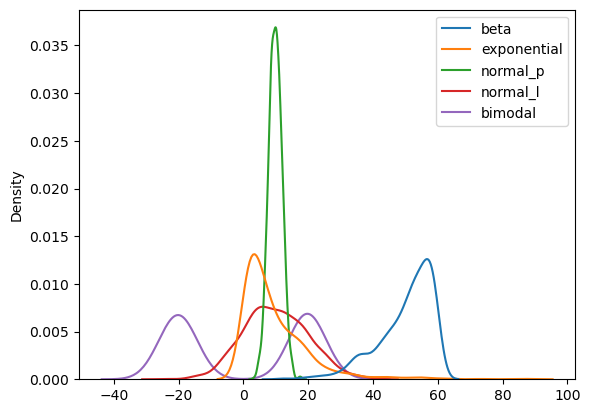

In [4]:
sns.kdeplot(data=df)

In [5]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.178703,9.707447,9.873267,9.973852,-0.161612
std,8.406829,10.510558,2.037614,9.826000,20.208408
min,12.310955,0.002608,3.418261,-23.827212,-28.489437
25%,45.623681,2.646400,8.487619,3.192598,-20.024363
50%,52.557687,6.484923,9.880503,9.682805,-1.097287
75%,56.884346,13.628918,11.240802,16.776075,19.690005
max,59.984685,87.514230,17.744925,40.241759,29.874176


<AxesSubplot:ylabel='Density'>

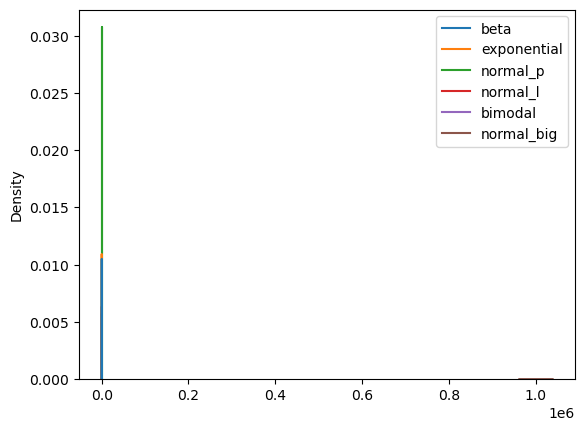

In [6]:
normal_big = np.random.normal(1000000,10000,(1000,1)) #normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

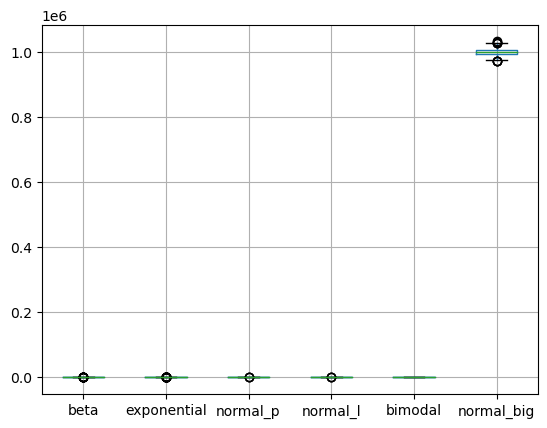

In [7]:
df.boxplot()

In [11]:
#khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

#chuẩn hóa dữ liệu trong df với standard scaler
df_s = scaler.fit_transform(df)

#lấy danh sách cột
col_names = list(df.columns)

#chuyển về dataframe, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)


In [12]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.973017,0.053599,0.492396,0.539156,0.768445,0.344202
1,0.914213,0.182828,0.368066,0.615347,0.769239,0.283448
2,0.651336,0.018004,0.465242,0.314578,0.851375,0.621632
3,0.823976,0.046917,0.495450,0.684985,0.786419,0.845438
4,0.460029,0.048448,0.547093,0.417777,0.804093,0.568749


<AxesSubplot:ylabel='Density'>

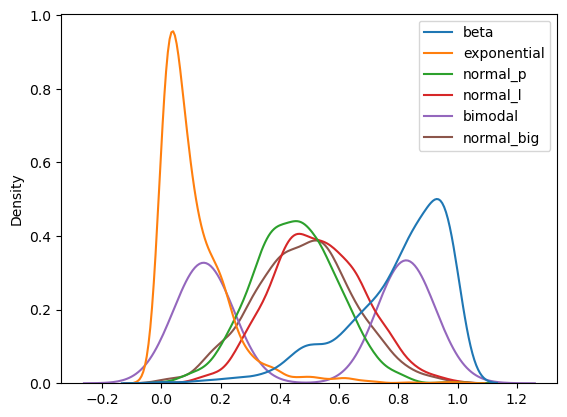

In [13]:
sns.kdeplot(data=df_s)

<AxesSubplot:>

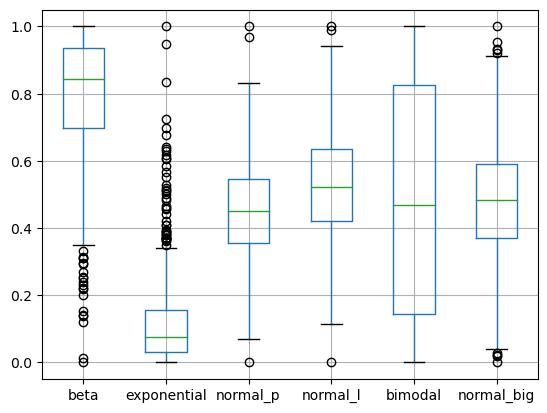

In [14]:
df_s.boxplot()

In [15]:
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.794311,0.110898,0.450559,0.527573,0.485368,0.480313
std,0.176341,0.120105,0.142225,0.153366,0.346250,0.166132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.698765,0.030211,0.353841,0.421730,0.145040,0.370136
50%,0.844212,0.074074,0.451064,0.523030,0.469336,0.484242
75%,0.934968,0.155709,0.546013,0.633743,0.825505,0.590105
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# lấy giá trị min của cột beta
df_s['beta'].min()


0.0

In [17]:
#lấy giá max của cột beta
df_s['beta'].max() 

0.9999999999999999

In [18]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[12.310955171830452,
 0.002607594268249308,
 3.418261239977328,
 -23.827212183643248,
 -28.48943707628772,
 970285.9361964195]

In [20]:
# in các giá trị min của từng cột trong dữ liêu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [21]:
# in các giá trị max của từng cột trong dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.98468501126268,
 87.51422958270034,
 17.74492542633338,
 40.24175852360679,
 29.874176164352384,
 1031579.9056294927]

In [22]:
# in các giá trị của từng cột trong dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df.columns]
maxs

[0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0]